In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
ROOT.gROOT.ProcessLine("gErrorIgnoreLevel = 3001;"); # suppress ROOT messages
ROOT.disableJSVis()
ROOT.gStyle.SetOptStat(0)
# ROOT.gROOT.ProcessLine(".x ~/env/MJDClintPlotStyle.C");

dsBcMax = [826,642,658,578,770] # cdf method

# results:
# DS0: 
# raw 99: 0.940  95: 0.855  90: 0.800  01: 0.280  05: 0.425
# bg 99: 0.995  95: 0.950  90: 0.930  01: 0.495  05: 0.540
# ext 99: 0.685  95: 0.660  90: 0.645  01: 0.445  05: 0.490
# DS1: 
# raw 99: 0.955  95: 0.875  90: 0.815  01: 0.005  05: 0.350
# bg 99: 1.020  95: 0.990  90: 0.970  01: 0.490  05: 0.640
# DS2: none yet
# DS3: 
# raw 99: 0.940  95: 0.855  90: 0.800  01: 0.280  05: 0.425
# bg 99: 0.995  95: 0.950  90: 0.930  01: 0.495  05: 0.540
# DS4: 
# raw 99: 0.990  95: 0.920  90: 0.875  01: 0.370  05: 0.480
# bg 99: 0.975  95: 0.955  90: 0.945  01: 0.000  05: 0.585
# DS5: 
# raw 99: 0.915  95: 0.830  90: 0.770  01: 0.310  05: 0.380
# bg 99: 0.905  95: 0.850  90: 0.815  01: 0.210  05: 0.285

def npTH1D(hist,lower,upper):
    bins = hist.GetNbinsX()
    xArr = np.arange(lower,upper,(upper-lower)/float(bins))
    yArr = np.zeros(bins)
    for i in range(bins): yArr[i] = hist.GetBinContent(i)    
    return xArr,yArr

def integFunc(arr):
    integ = np.zeros(len(arr))
    sum = 0
    for i in range(0,len(arr)):
        sum+=arr[i]
        integ[i] = sum
    return integ

def GetIntegralPoints(hist,lower,upper):
    x_h0, y_h0 = npTH1D(hist,lower,upper)
    int_h0 = integFunc(y_h0)
    
    idx99 = np.where(int_h0 > 0.99)
    idx95 = np.where(int_h0 > 0.95)
    idx90 = np.where(int_h0 > 0.90)
    idx01 = np.where(int_h0 > 0.01)
    idx05 = np.where(int_h0 > 0.05)
    idx10 = np.where(int_h0 > 0.10)
    idx15 = np.where(int_h0 > 0.15)
    
    val99 = x_h0[idx99][0]
    val95 = x_h0[idx95][0]
    val90 = x_h0[idx90][0]
    val01 = x_h0[idx01][0]
    val05 = x_h0[idx05][0]
    val10 = x_h0[idx10][0]
    val15 = x_h0[idx15][0]
    return val01,val05,val10,val15,val90,val95,val99

Welcome to JupyROOT 6.08/06


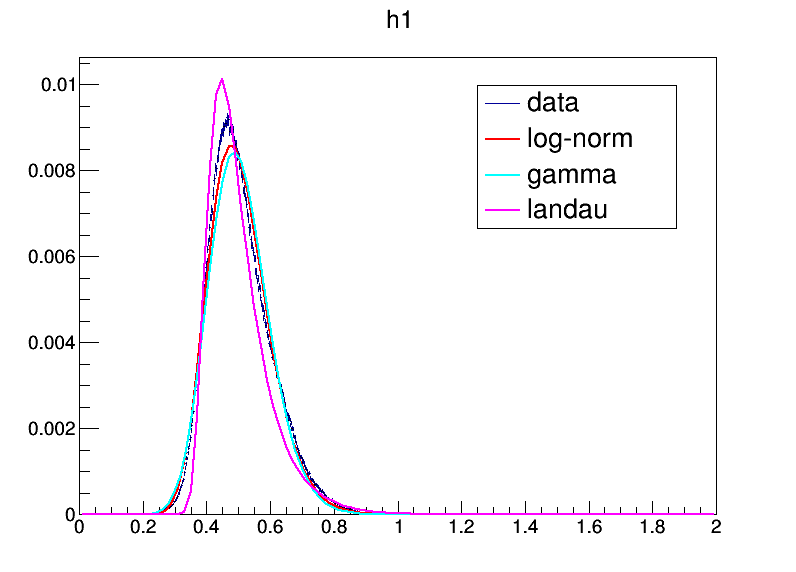

In [2]:
# The moral of the story:  NONE of the methods really fit this very well.
# It could be from going down to 5 kev and having the spectrum get distorted.
# I like the direct integral method.

ds = 0
f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
ExtCut = "channel == 624"
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)
Ext = ROOT.TChain("mjdTree"); Ext.Add("~/project/ForceTrigger/lat_run72*.root")

c1 = ROOT.TCanvas("c1","c1",800,600)

h1 = ROOT.TH1D("h1","h1",1000,0,2)
calib.Project("h1","(waveS4-waveS1)/bcMax/trapENFCal",theCut+"&& trapENFCal > 5")
h1.Scale(1/h1.Integral())
h1.Draw()

# # log-normal (probably the closest)
f2 = ROOT.TF1("f2","([0]/x) * exp(-1.0 * (log(x) - [1])**2 / 2 * [2]**2)",0,5)
f2.SetParameter(0,1e-3)
f2.SetParameter(1,-0.1)
f2.SetParameter(2,5)
f2.SetLineColor(ROOT.kRed)
h1.Fit("f2","q")
f2.Draw("same")

# gamma
f3 = ROOT.TF1("f3","([0]/(TMath::Gamma([1]) * [2]**[1])) * x**([1]-1) * exp((-1 * x)/[2])",0.1,5)
f3.SetParameter(0,0.0018)
f3.SetParameter(1,30)
f3.SetParameter(2,0.015)
f3.SetLineColor(ROOT.kCyan)
h1.Fit("f3","q")
f3.Draw("same")

# modified landau from wiki page
f4 = ROOT.TF1("f4","([0]/sqrt(2*pi)) * exp(-0.5 * ((x-[1])/[2] + exp(-(x-[1])/[2]) ))",0,5) 
f4.SetParameter(0,0.04)
f4.SetParameter(1,0.45)
f4.SetParameter(2,0.05)
f4.SetLineColor(ROOT.kMagenta)
h1.Fit("f4","q")
f4.Draw("same")

l1 = ROOT.TLegend(0.6,0.6,0.85,0.85)
l1.AddEntry(h1,"data","l")
# l1.AddEntry(f1,"gaus","l")
l1.AddEntry(f2,"log-norm","l")
l1.AddEntry(f3,"gamma","l")
l1.AddEntry(f4,"landau","l")
l1.Draw("same")

c1.Draw()

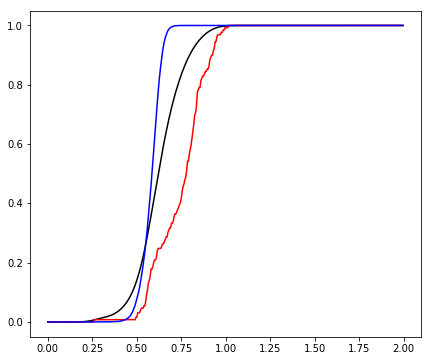

raw 99: 0.940  95: 0.855  90: 0.800  01: 0.280  05: 0.425
bg 99: 0.995  95: 0.950  90: 0.930  01: 0.495  05: 0.540
ext 99: 0.685  95: 0.660  90: 0.645  01: 0.445  05: 0.490


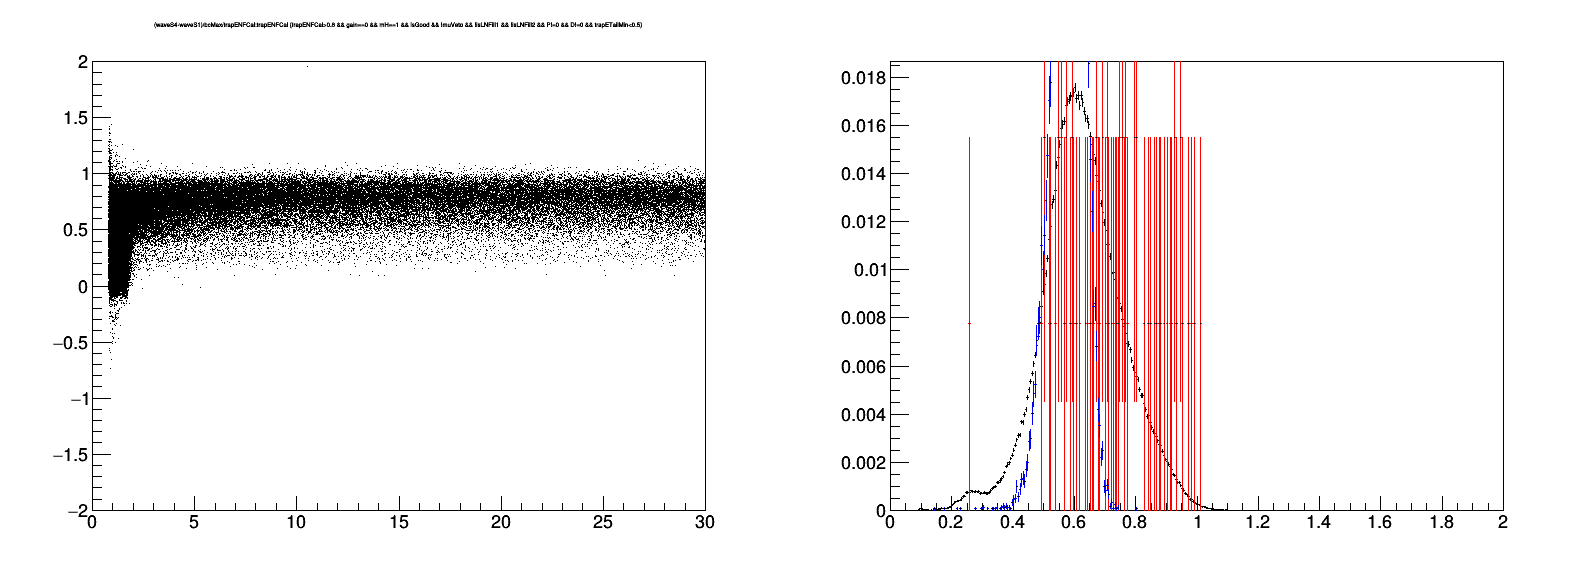

In [15]:
# This compares noiseWeight with and without the bcMax cut.
# The later cells don't bother applying the bcMax cut. 
# (This one shows it doesn't make a big difference in the suggested cut values.)

ds = 0
bins, lower, upper = 400,0.,2

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1); ROOT.gPad.SetLogy(0)
calib.Draw("(waveS4-waveS1)/bcMax/trapENFCal:trapENFCal>>h1(10,0,30,10,-2,2)",theCut)
c.cd(2); ROOT.gPad.SetLogy(0)
h0 = ROOT.TH1D("h0","",bins,lower,upper)
calib.Project("h0","(waveS4-waveS1)/bcMax/trapENFCal",theCut+"&&trapENFCal>5")
h01 = ROOT.TH1D("h01","",bins,lower,upper)
bg.Project("h01","(waveS4-waveS1)/bcMax/trapENFCal",theCut+bgCut)
h02 = ROOT.TH1D("h02","",bins,lower,upper)
Ext.Project("h02","(waveS4-waveS1)/bcMax/trapENFCal",ExtCut)
h0.Scale(1./h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1./h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
h02.Scale(1./h02.Integral()); h02.SetLineColor(ROOT.kBlue); h02.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0,lower,upper)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01,lower,upper)
ext01,ext05,ext10,ext15,ext90,ext95,ext99 = GetIntegralPoints(h02,lower,upper)
# wbc01,wbc05,wbc10,wbc15,wbc90,wbc95,wbc99 = GetIntegralPoints(h1,lower,upper)
print "raw 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (raw99,raw95,raw90,raw01,raw05)
print "bg 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (bg99,bg95,bg90,bg01,bg05)
print "ext 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (ext99,ext95,ext90,ext01,ext05)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0,lower,upper)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01,lower,upper)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
x2_h0, y2_h0 = npTH1D(h02,lower,upper)
int2_h0 = integFunc(y2_h0)
plt.plot(x2_h0,int2_h0,'blue')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

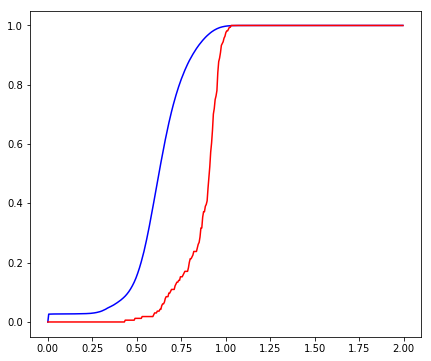

raw 99: 0.955  95: 0.875  90: 0.815  01: 0.005  05: 0.350
bg 99: 1.020  95: 0.990  90: 0.970  01: 0.490  05: 0.640


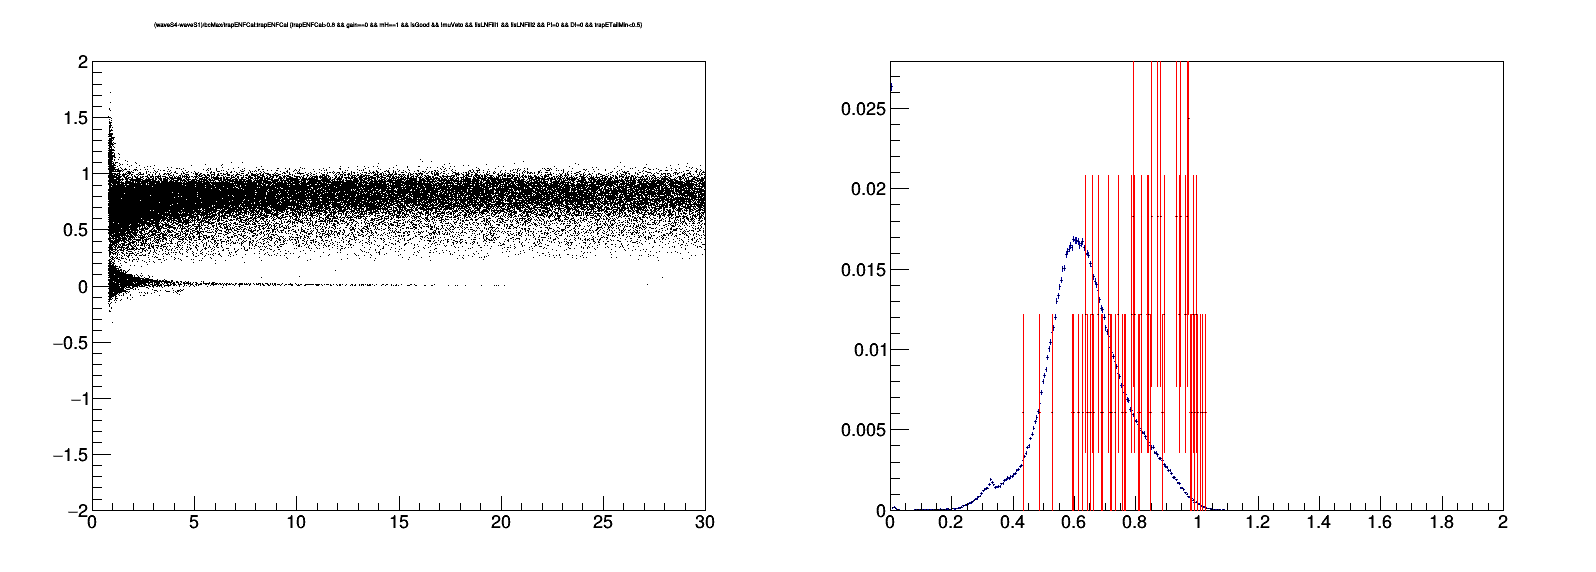

In [16]:
ds = 1
bins, lower, upper = 400,0,2
f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)
c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(0)
calib.Draw("(waveS4-waveS1)/bcMax/trapENFCal:trapENFCal>>h1(10,0,30,10,-2,2)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
calib.Project("h0","(waveS4-waveS1)/bcMax/trapENFCal",theCut+"&& trapENFCal > 5")
bg.Project("h01","(waveS4-waveS1)/bcMax/trapENFCal",theCut+bgCut)
h0.Scale(1/h0.Integral()); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0,lower,upper)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01,lower,upper)
print "raw 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (raw99,raw95,raw90,raw01,raw05)
print "bg 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (bg99,bg95,bg90,bg01,bg05)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0,lower,upper)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'b')
x1_h0, y1_h0 = npTH1D(h01,lower,upper)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

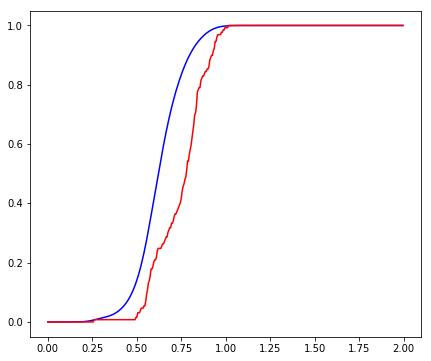

raw 99: 0.940  95: 0.855  90: 0.800  01: 0.280  05: 0.425
bg 99: 0.995  95: 0.950  90: 0.930  01: 0.495  05: 0.540


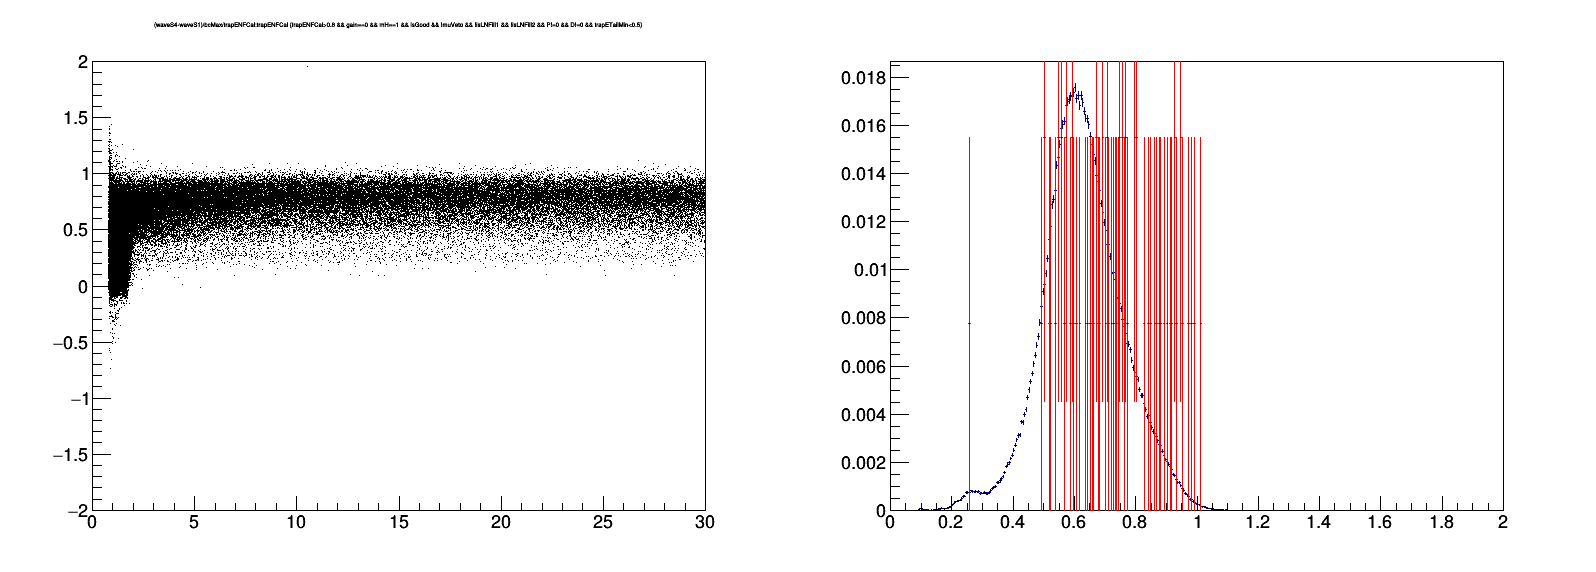

In [14]:
ds = 3
bins, lower, upper = 400,0,2
f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)
c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(0)
calib.Draw("(waveS4-waveS1)/bcMax/trapENFCal:trapENFCal>>h1(10,0,30,10,-2,2)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
calib.Project("h0","(waveS4-waveS1)/bcMax/trapENFCal",theCut+"&& trapENFCal > 5")
bg.Project("h01","(waveS4-waveS1)/bcMax/trapENFCal",theCut+bgCut)
h0.Scale(1/h0.Integral()); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0,lower,upper)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01,lower,upper)
print "raw 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (raw99,raw95,raw90,raw01,raw05)
print "bg 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (bg99,bg95,bg90,bg01,bg05)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0,lower,upper)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'b')
x1_h0, y1_h0 = npTH1D(h01,lower,upper)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

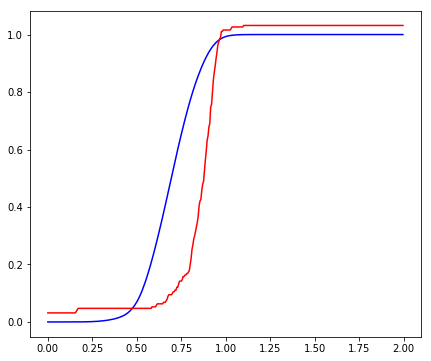

raw 99: 0.990  95: 0.920  90: 0.875  01: 0.370  05: 0.480
bg 99: 0.975  95: 0.955  90: 0.945  01: 0.000  05: 0.585


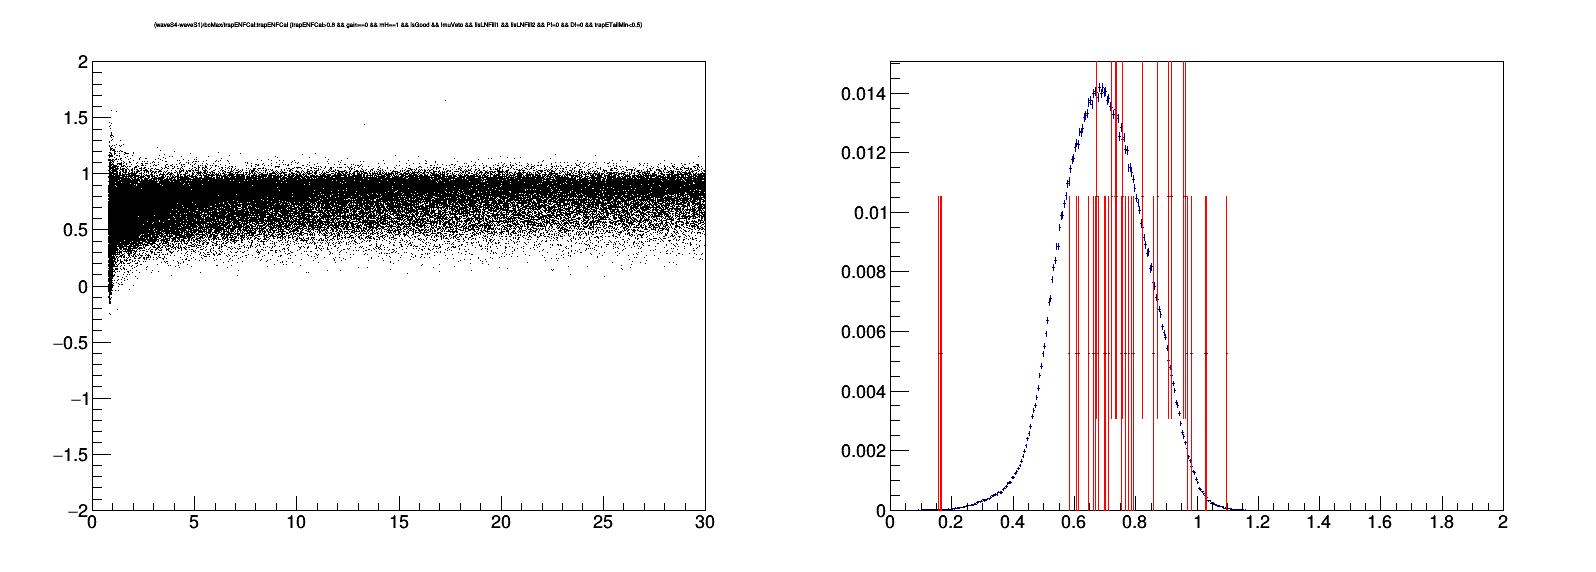

In [13]:
ds = 4
bins, lower, upper = 400,0,2
f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)
c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(0)
calib.Draw("(waveS4-waveS1)/bcMax/trapENFCal:trapENFCal>>h1(10,0,30,10,-2,2)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
calib.Project("h0","(waveS4-waveS1)/bcMax/trapENFCal",theCut+"&& trapENFCal > 5")
bg.Project("h01","(waveS4-waveS1)/bcMax/trapENFCal",theCut+bgCut)
h0.Scale(1/h0.Integral()); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0,lower,upper)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01,lower,upper)
print "raw 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (raw99,raw95,raw90,raw01,raw05)
print "bg 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (bg99,bg95,bg90,bg01,bg05)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0,lower,upper)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'b')
x1_h0, y1_h0 = npTH1D(h01,lower,upper)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

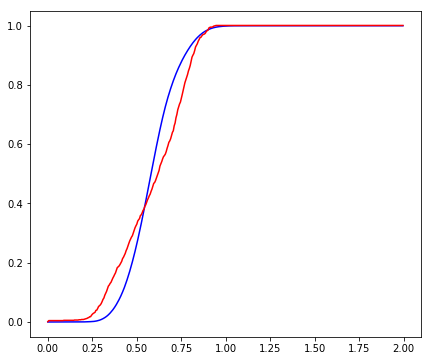

raw 99: 0.915  95: 0.830  90: 0.770  01: 0.310  05: 0.380
bg 99: 0.905  95: 0.850  90: 0.815  01: 0.210  05: 0.285


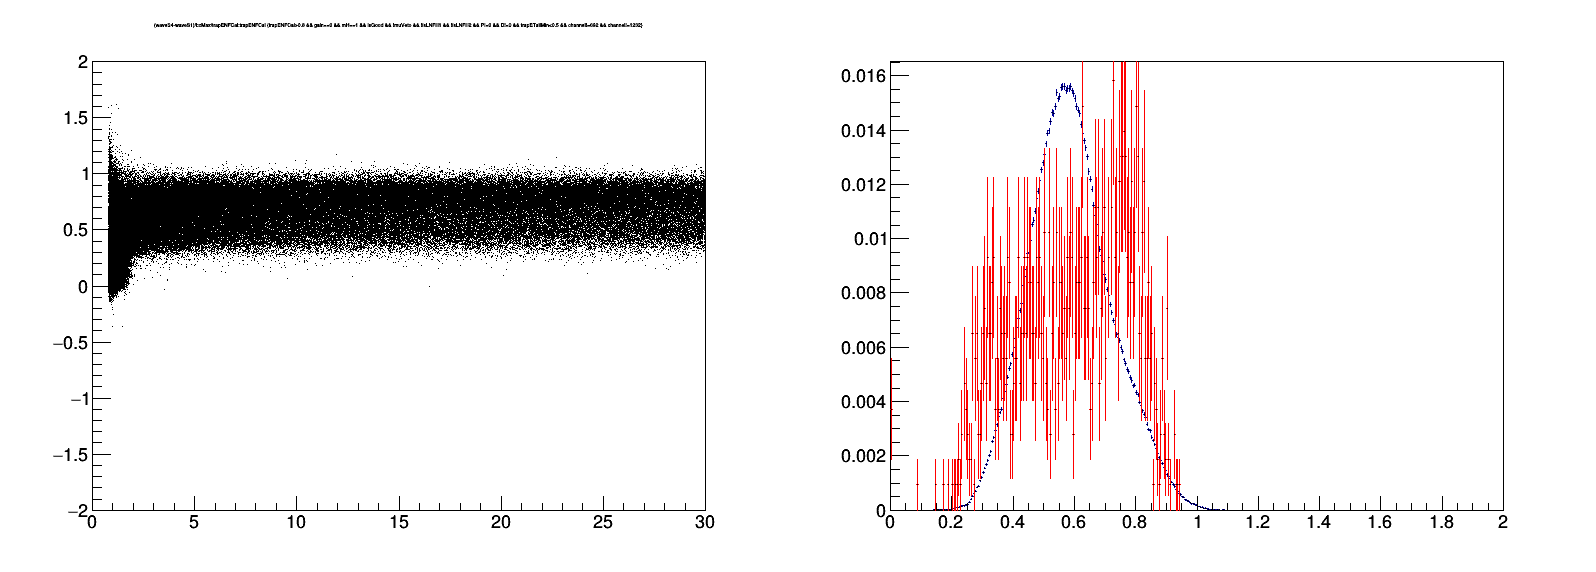

In [17]:
ds = 5
bins, lower, upper = 400,0,2
f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)
c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(0)
calib.Draw("(waveS4-waveS1)/bcMax/trapENFCal:trapENFCal>>h1(10,0,30,10,-2,2)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
calib.Project("h0","(waveS4-waveS1)/bcMax/trapENFCal",theCut+"&& trapENFCal > 5")
bg.Project("h01","(waveS4-waveS1)/bcMax/trapENFCal",theCut+bgCut)
h0.Scale(1/h0.Integral()); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0,lower,upper)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01,lower,upper)
print "raw 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (raw99,raw95,raw90,raw01,raw05)
print "bg 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (bg99,bg95,bg90,bg01,bg05)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0,lower,upper)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'b')
x1_h0, y1_h0 = npTH1D(h01,lower,upper)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()